In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
old = pd.read_csv('Financial Analytics data.csv')
old.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [4]:
old.shape

(488, 5)

In [5]:
old.isna().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [6]:
old['Mar Cap - Crore'].fillna(old['Mar Cap - Crore'].mean(), inplace = True)
old['Sales Qtr - Crore'].fillna(old['Sales Qtr - Crore'].mean(), inplace = True)
old.isna().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        0
Sales Qtr - Crore      0
Unnamed: 4           394
dtype: int64

In [7]:
df = old.drop(columns=['Unnamed: 4'])

In [8]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    488 non-null    float64
 3   Sales Qtr - Crore  488 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,28043.857119,4395.976849
std,145.884078,58912.585788,9589.680655
min,1.000000,3017.070000,47.240000
25%,122.750000,4879.612500,725.732500
50%,252.500000,10380.425000,2095.335000
75%,378.250000,25502.085000,4395.976849
max,500.000000,583436.720000,110666.930000


In [14]:
df['MarCap To Sales'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']
bins = [0, 1000, 5000, 10000, np.inf]
labels = ['Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']
df['MarCap Category'] = pd.cut(df['Mar Cap - Crore'], bins = bins, labels = labels)

<ipython-input-15-adf916887fe1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MarCap Category', data=df, palette = 'viridis')


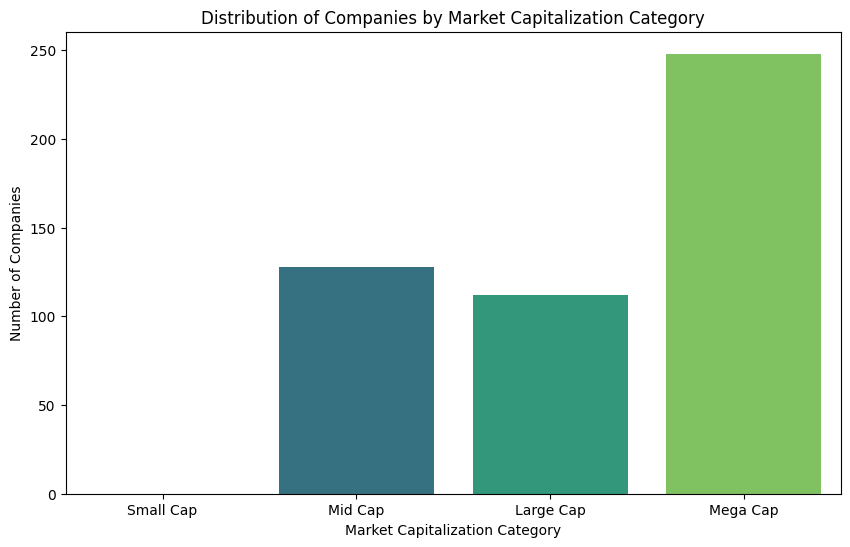

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='MarCap Category', data=df, palette = 'viridis')
plt.title('Distribution of Companies by Market Capitalization Category')
plt.xlabel('Market Capitalization Category')
plt.ylabel('Number of Companies')
plt.show()

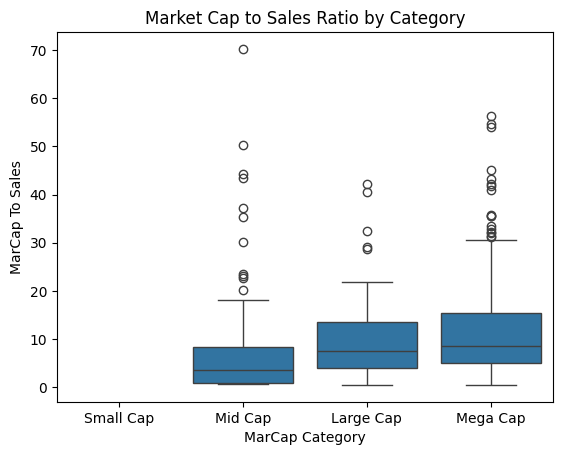

In [16]:
sns.boxplot(x='MarCap Category', y = 'MarCap To Sales', data=df)
plt.title('Market Cap to Sales Ratio by Category')
plt.show()

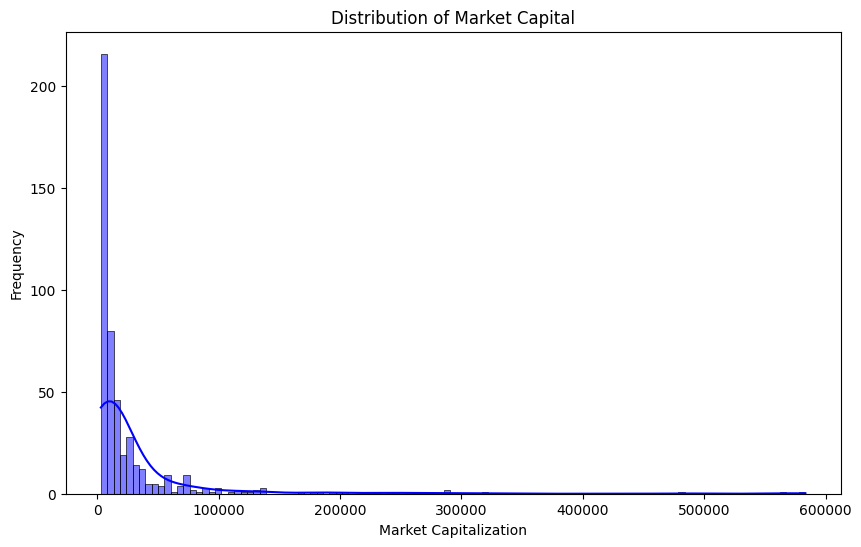

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['Mar Cap - Crore'], kde=True, color='blue')
plt.title('Distribution of Market Capital')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.show()

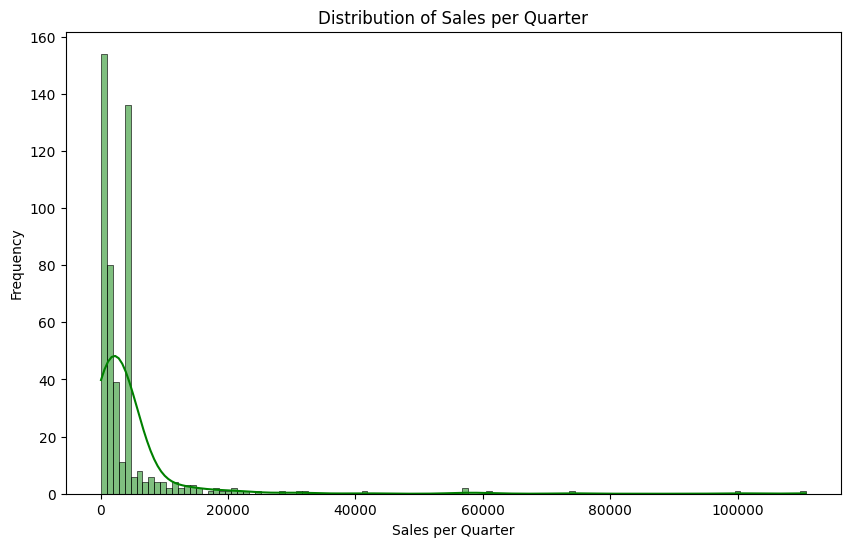

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sales Qtr - Crore'], kde=True, color='green')
plt.title('Distribution of Sales per Quarter')
plt.xlabel('Sales per Quarter')
plt.ylabel('Frequency')
plt.show()

In [21]:
df['Log MarCap'] = np.log(df['Mar Cap - Crore'])
df['Log Sales'] = np.log(df['Sales Qtr - Crore'])

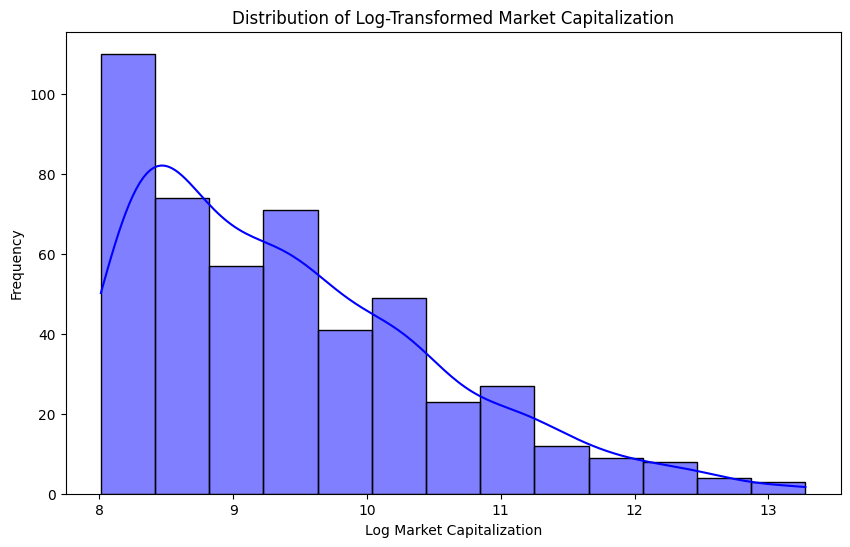

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Log MarCap'], kde=True, color='blue')
plt.title('Distribution of Log-Transformed Market Capitalization')
plt.xlabel('Log Market Capitalization')
plt.ylabel('Frequency')
plt.show()

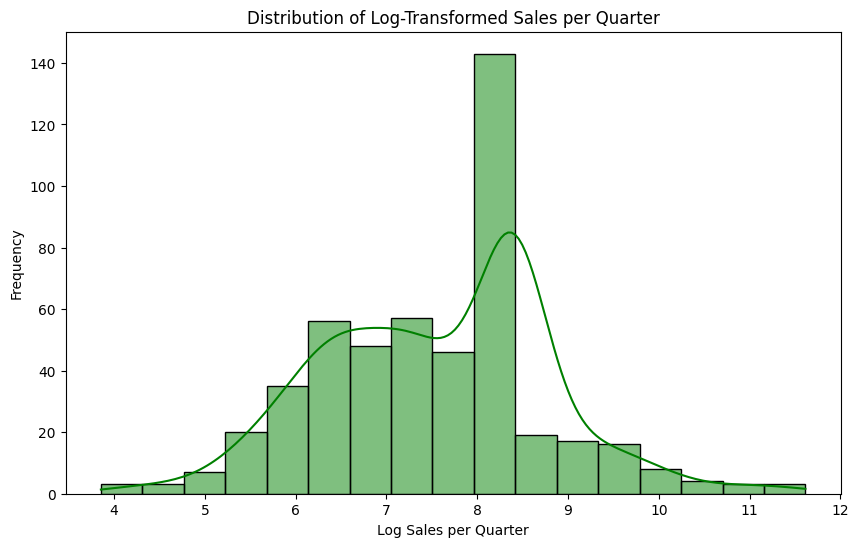

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['Log Sales'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Sales per Quarter')
plt.xlabel('Log Sales per Quarter')
plt.ylabel('Frequency')
plt.show()

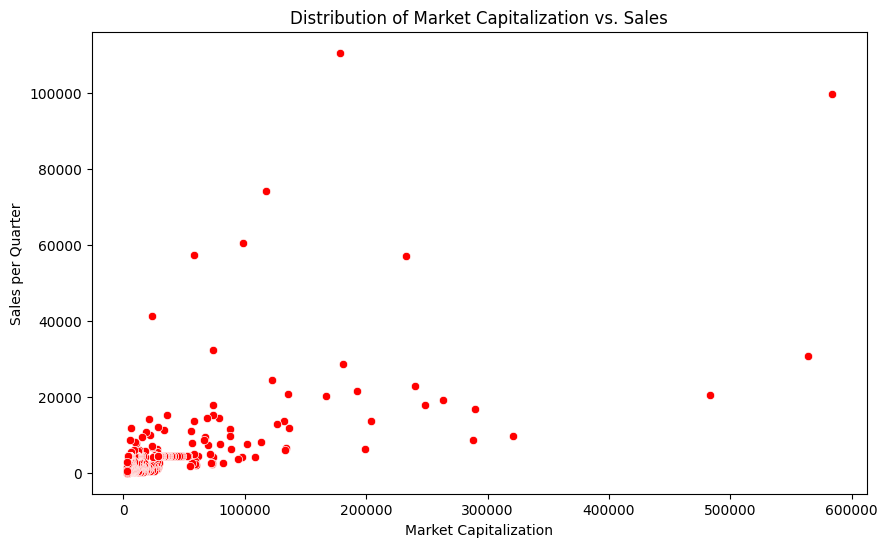

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mar Cap - Crore', y = 'Sales Qtr - Crore', data = df, color='red')
plt.title('Distribution of Market Capitalization vs. Sales')
plt.xlabel('Market Capitalization')
plt.ylabel('Sales per Quarter')
plt.show()

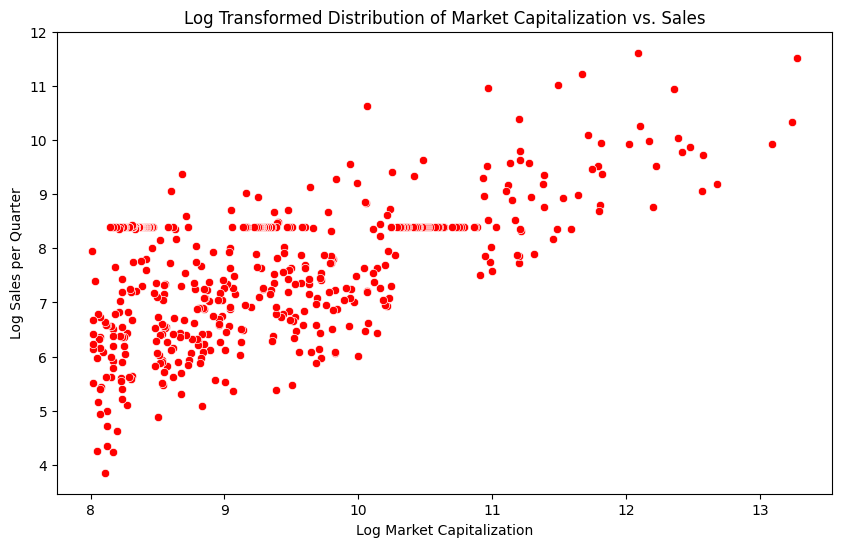

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log MarCap', y = 'Log Sales', data = df, color='red')
plt.title('Log Transformed Distribution of Market Capitalization vs. Sales')
plt.xlabel('Log Market Capitalization')
plt.ylabel('Log Sales per Quarter')
plt.show()

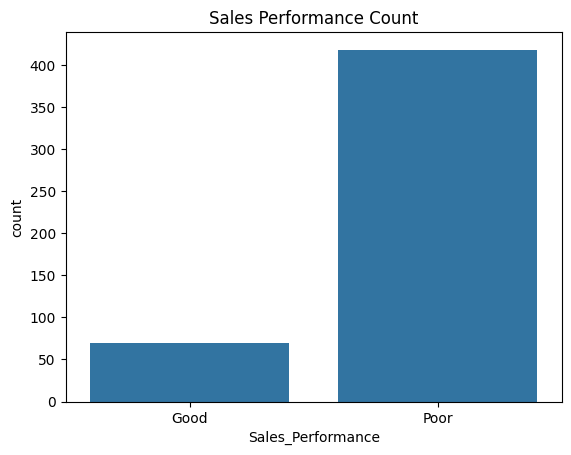

In [26]:
sales_threshold = df['Sales Qtr - Crore'].mean()
df['Sales_Performance'] = df['Sales Qtr - Crore'].apply(lambda x: 'Good' if x > sales_threshold else 'Poor')

sns.countplot(x='Sales_Performance', data=df)
plt.title('Sales Performance Count')
plt.show()

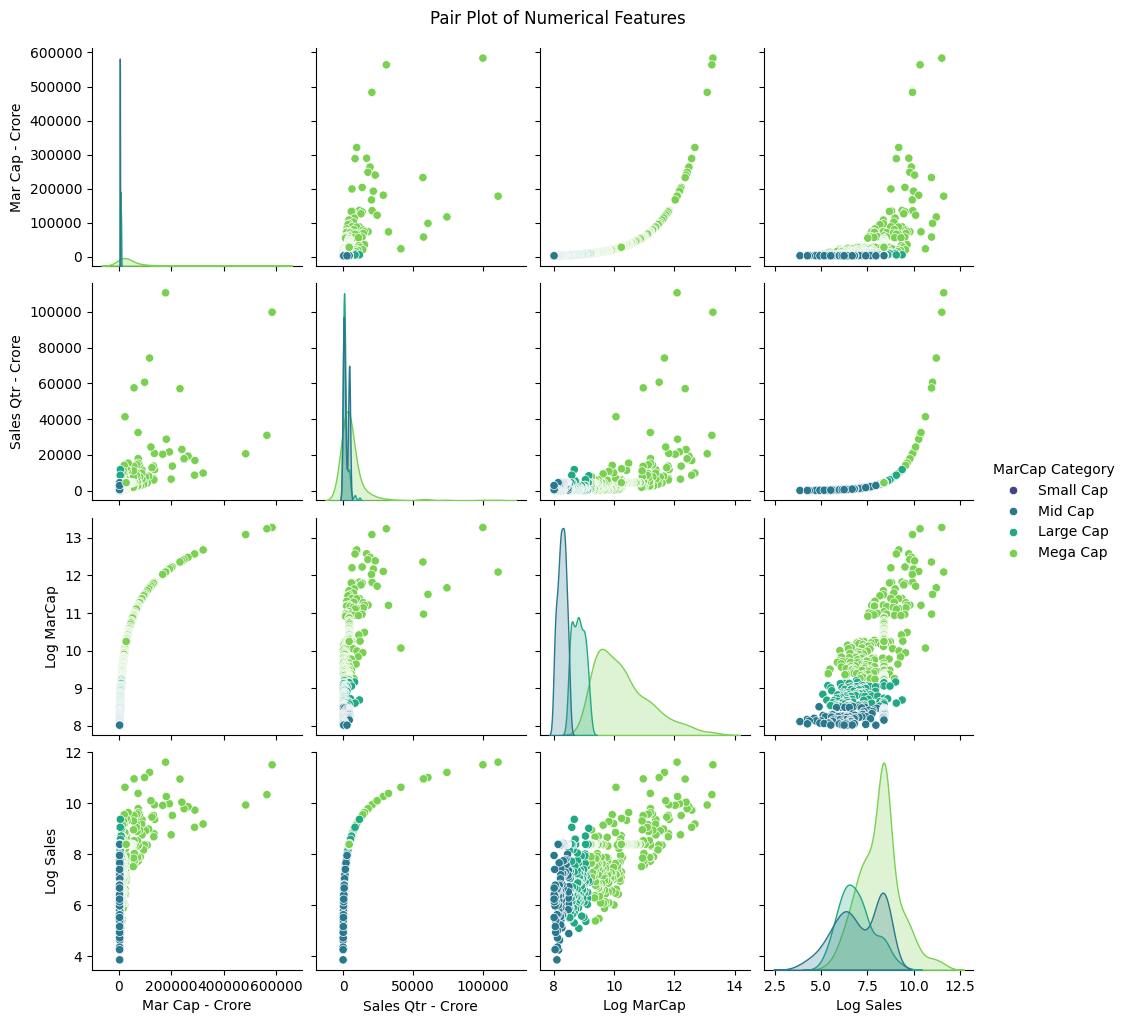

In [30]:
sns.pairplot(df, vars=['Mar Cap - Crore', 'Sales Qtr - Crore', 'Log MarCap', 'Log Sales'], hue='MarCap Category', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap To Sales  MarCap Category  Log MarCap  Log Sales  Sales_Performance
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024  Good                 1
2      TCS             563709.84        30904.00           18.240676        Mega Cap         13.242295   10.338641  Good                 1
3      HDFC Bank       482953.59        20581.27           23.465685        Mega Cap         13.087676   9.932137   Good                 1
4      ITC             320985.27        9772.02            32.847382        Mega Cap         12.679151   9.187278   Good                 1
5      H D F C         289497.37        16840.51           17.190535        Mega Cap         12.575901   9.731543   Good                 1
Name: count, dtype: int64


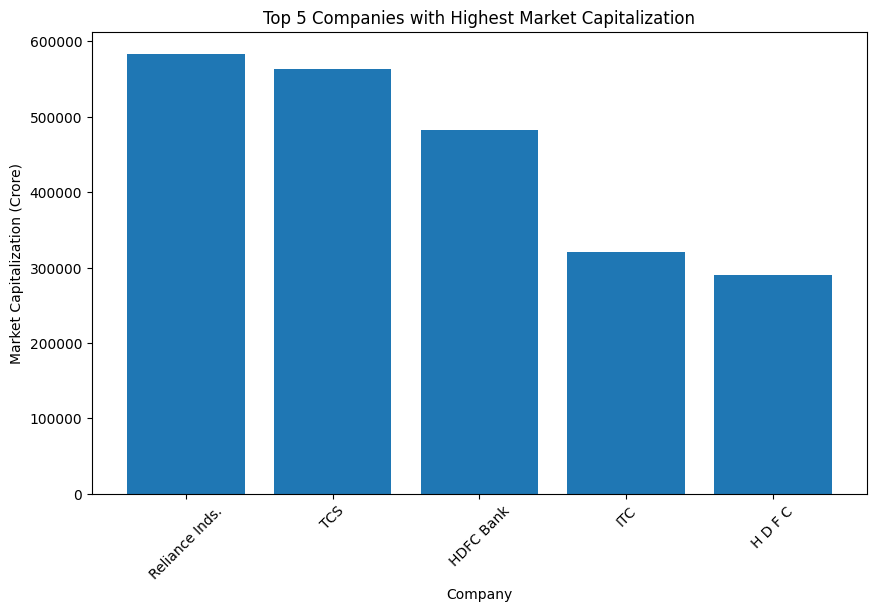

In [31]:
sorted_data = df.sort_values('Mar Cap - Crore', ascending=False)

top_5_companies = sorted_data.head(5)
print(top_5_companies.value_counts())

plt.figure(figsize=(10, 6))
plt.bar(top_5_companies['Name'], top_5_companies['Mar Cap - Crore'])
plt.title('Top 5 Companies with Highest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

S.No.  Name             Mar Cap - Crore  Sales Qtr - Crore  MarCap To Sales  MarCap Category  Log MarCap  Log Sales  Sales_Performance
495    Prime Focus      3031.50          609.61             4.972851         Mid Cap          8.016813    6.412819   Poor                 1
496    Lak. Vilas Bank  3029.57          790.17             3.834074         Mid Cap          8.016176    6.672248   Poor                 1
497    NOCIL            3026.26          249.27             12.140490        Mid Cap          8.015083    5.518537   Poor                 1
498    Orient Cement    3024.32          511.53             5.912302         Mid Cap          8.014442    6.237406   Poor                 1
499    Natl.Fertilizer  3017.07          2840.75            1.062068         Mid Cap          8.012041    7.951823   Poor                 1
Name: count, dtype: int64


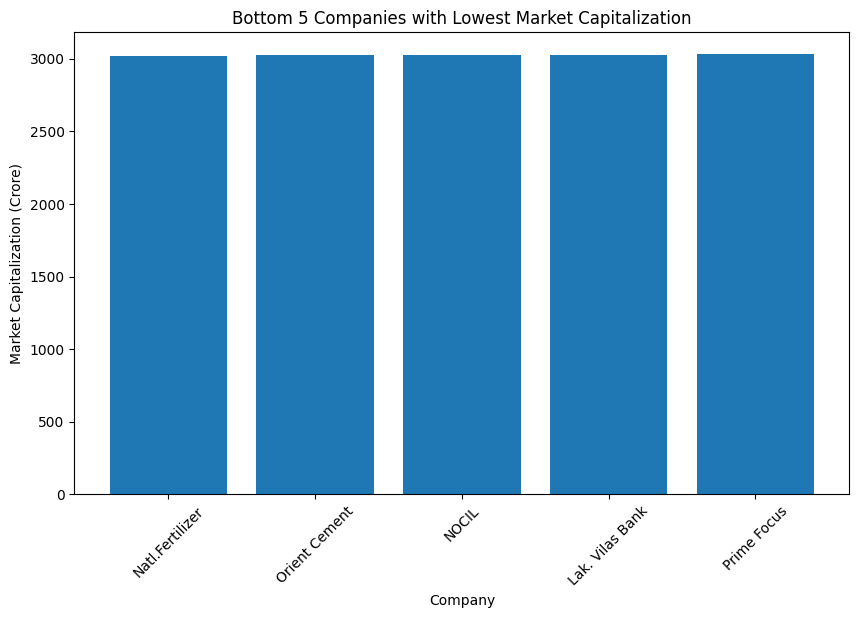

In [32]:
sorted_data = df.sort_values('Mar Cap - Crore')

bottom_5_companies = sorted_data.head(5)
print(bottom_5_companies.value_counts())


plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies['Name'], bottom_5_companies['Mar Cap - Crore'])
plt.title('Bottom 5 Companies with Lowest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap To Sales  MarCap Category  Log MarCap  Log Sales  Sales_Performance
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024  Good                 1
15     I O C L         178017.48        110666.93          1.608588         Mega Cap         12.089637   11.614280  Good                 1
24     Tata Motors     117071.87        74156.07           1.578723         Mega Cap         11.670543   11.213927  Good                 1
28     B P C L         98278.00         60616.36           1.621311         Mega Cap         11.495555   11.012320  Good                 1
55     H P C L         58034.78         57474.25           1.009753         Mega Cap         10.968798   10.959092  Good                 1
Name: count, dtype: int64


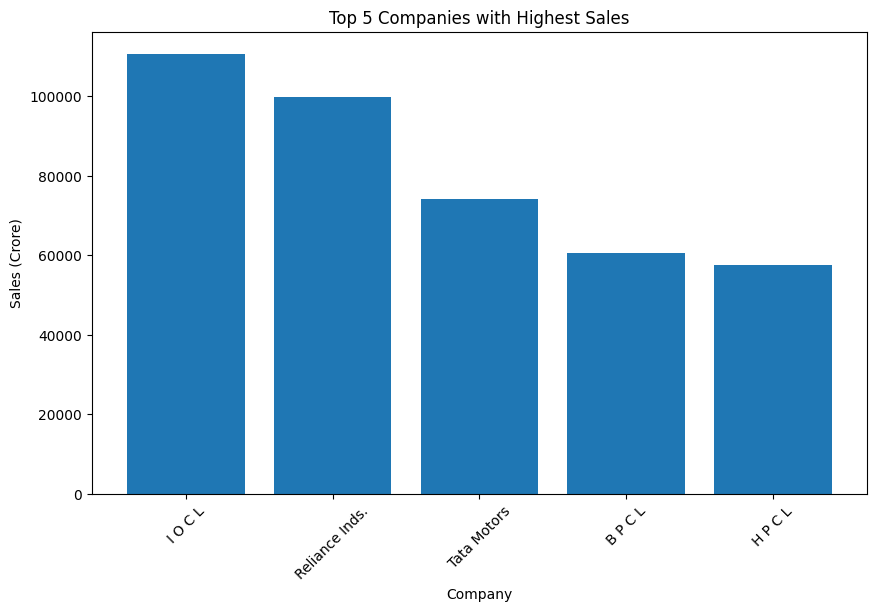

In [33]:
sorted_data = df.sort_values('Sales Qtr - Crore', ascending=False)

top_5_companies_sales = sorted_data.head(5)

print(top_5_companies_sales.value_counts())
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_sales['Name'], top_5_companies_sales['Sales Qtr - Crore'])
plt.title('Top 5 Companies with Highest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap To Sales  MarCap Category  Log MarCap  Log Sales  Sales_Performance
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024  Good                 1
15     I O C L         178017.48        110666.93          1.608588         Mega Cap         12.089637   11.614280  Good                 1
24     Tata Motors     117071.87        74156.07           1.578723         Mega Cap         11.670543   11.213927  Good                 1
28     B P C L         98278.00         60616.36           1.621311         Mega Cap         11.495555   11.012320  Good                 1
55     H P C L         58034.78         57474.25           1.009753         Mega Cap         10.968798   10.959092  Good                 1
Name: count, dtype: int64


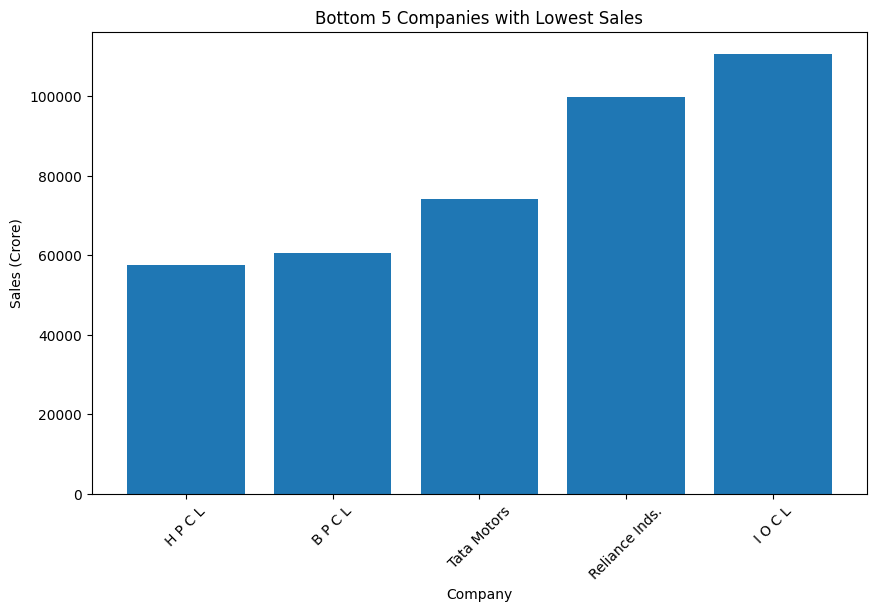

In [34]:
sorted_data = df.sort_values('Sales Qtr - Crore')

bottom_5_companies_sales = sorted_data.tail(5)
print(bottom_5_companies_sales.value_counts())

plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies_sales['Name'], bottom_5_companies_sales['Sales Qtr - Crore'])
plt.title('Bottom 5 Companies with Lowest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

S.No.  Name              Mar Cap - Crore  Sales Qtr - Crore  MarCap To Sales  MarCap Category  Log MarCap  Log Sales  Sales_Performance
130    Gillette India    21976.74         407.52             53.928004        Mega Cap         9.997740    6.010090   Poor                 1
193    Indiabulls Vent.  13396.15         238.43             56.184834        Mega Cap         9.502723    5.474076   Poor                 1
215    Symphony          11882.55         217.63             54.599779        Mega Cap         9.382826    5.382796   Poor                 1
468    La Opala RG       3510.93          69.77              50.321485        Mid Cap          8.163636    4.245204   Poor                 1
480    Central Dep. Ser  3316.31          47.24              70.201312        Mid Cap          8.106608    3.855241   Poor                 1
Name: count, dtype: int64


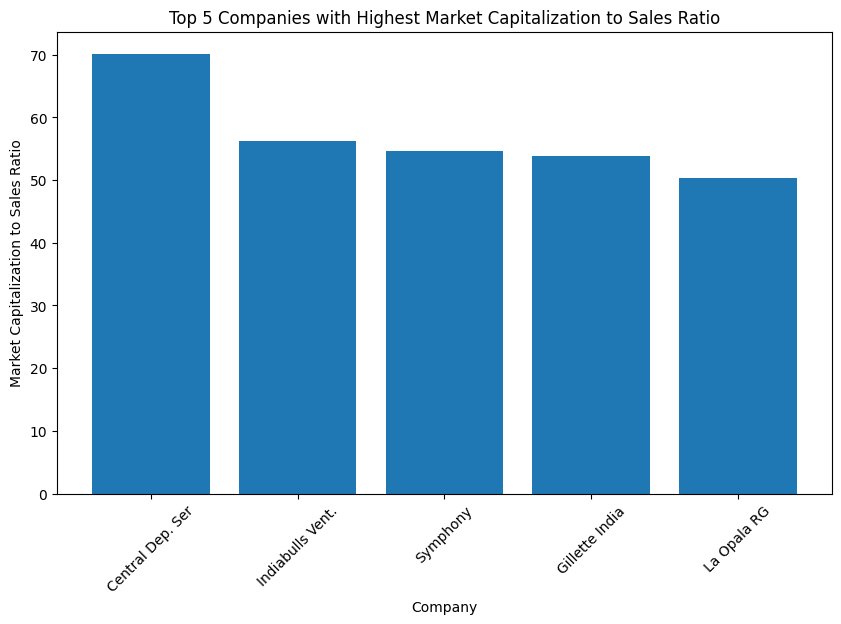

In [36]:
sorted_data = df.sort_values('MarCap To Sales', ascending=False)

top_5_companies_pm = sorted_data.head(5)


print(top_5_companies_pm.value_counts())

plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_pm['Name'], top_5_companies_pm['MarCap To Sales'])
plt.title('Top 5 Companies with Highest Market Capitalization to Sales Ratio')
plt.xlabel('Company')
plt.ylabel('Market Capitalization to Sales Ratio')
plt.xticks(rotation=45)
plt.show()

S.No.  Name             Mar Cap - Crore  Sales Qtr - Crore  MarCap To Sales  MarCap Category  Log MarCap  Log Sales  Sales_Performance
123    Rajesh Exports   23495.54         41304.840000       0.568833         Mega Cap         10.064566   10.628735  Good                 1
333    Redington India  5896.54          11728.400000       0.502757         Large Cap        8.682121    9.369769   Good                 1
347    C P C L          5427.82          8587.170000        0.632085         Large Cap        8.599293    9.058025   Good                 1
464    Amber Enterp.    3529.87          4395.976849        0.802977         Mid Cap          8.169016    8.388445   Poor                 1
472    Hind.Construct.  3452.57          4395.976849        0.785393         Mid Cap          8.146874    8.388445   Poor                 1
Name: count, dtype: int64


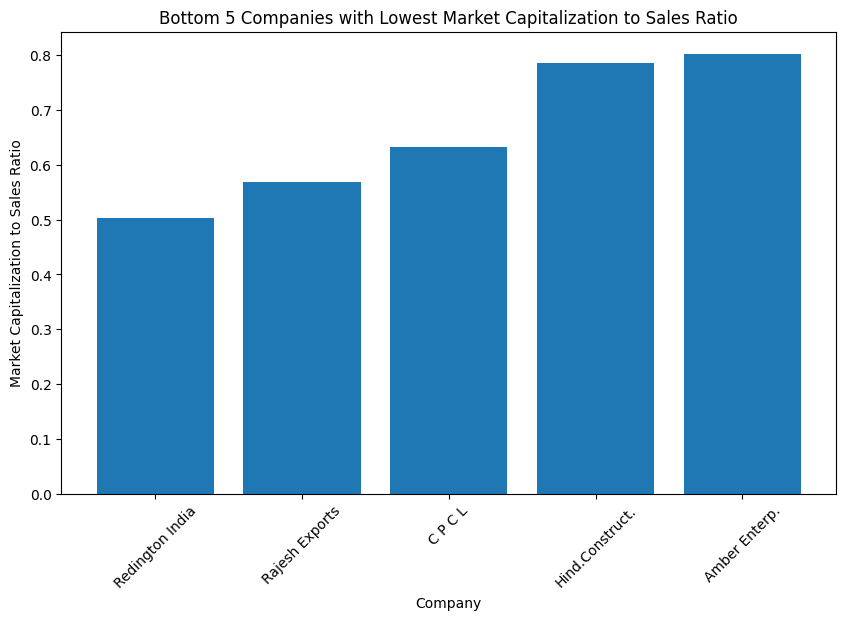

In [37]:
sorted_data = df.sort_values('MarCap To Sales')

# Select the bottom 5 companies with the lowest profit margin
bottom_5_companies_pm = sorted_data.head(5)


print(bottom_5_companies_pm.value_counts())

# Plot the profit margin of the bottom 5 companies

plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies_pm['Name'], bottom_5_companies_pm['MarCap To Sales'])
plt.title('Bottom 5 Companies with Lowest Market Capitalization to Sales Ratio')
plt.xlabel('Company')
plt.ylabel('Market Capitalization to Sales Ratio')
plt.xticks(rotation=45)
plt.show()